In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import locale
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

In [16]:
Covid_US_data = "time_series_covid19_confirmed_US.csv.txt"
Covid_US_df = pd.read_csv(Covid_US_data)

Covid_US_df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
3248,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0,0.0,...,303,344,501,483,533,648,677,915,838,908
3249,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,...,0,0,0,0,0,0,0,21,0,0
3250,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3251,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3252,84099999,US,USA,840,99999.0,NaN,Grand Princess,US,0.0,0.0,...,103,103,103,103,103,103,103,103,103,103


In [145]:
Last_Week_by_State = Covid_US_df.groupby(["Province_State"])["4/10/20"].sum().reset_index()
ByState_df = pd.DataFrame(Last_Week_by_State)
ByState_df = ByState_df.rename(columns={'Province_State': 'State/Territory','4/10/20': 'Confirmed # of Cases'})
ByState_df = ByState_df.sort_values("Confirmed # of Cases",ascending=[False]).head(5)
pd.options.display.float_format = '{:n}'.format
ByState_df

,State/Territory,Confirmed # of Cases
36,New York,172348
34,New Jersey,54588
26,Michigan,22434
5,California,21081
25,Massachusetts,20974


<BarContainer object of 5 artists>

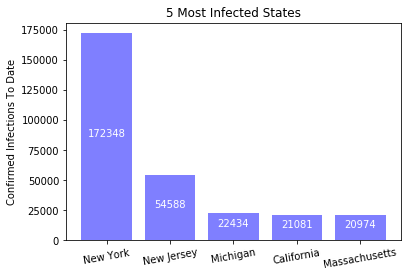

In [152]:
x_axis = ByState_df["State/Territory"] 
y_axis = ByState_df["Confirmed # of Cases"]
plt.tick_params(axis='x', which='major', labelsize=10, rotation=10)
plt.title("5 Most Infected States")
plt.ylabel("Confirmed Infections To Date")


def label(rects):
    for rect in rects:
        height = rect.get_height()
        label_position = height/2
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                "%d" % int(height),color="w",
                ha="center")

Bar_Plot = plt.bar(x_axis, y_axis, color="b", alpha = .5)
label(Bar_Plot)
Bar_Plot
